# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



# Combine the data into a single DataFrame
new_combined_df=mouse_metadata.merge(study_results, how='left')
#mouse_metadata.merge(study_results, how='right')
#mouse_metadata.merge(study_results, how='inner')
#mouse_metadata.merge(study_results, how='outer')
# Display the data table for preview

new_combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
##result needs to be 249
##TODO: nargiz, find the number of mice 
##step 1: get the mouse ID column from the dataframe
len(new_combined_df["Mouse ID"].unique())


249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
##g989
##step 1: get the duplicate mouse ID and Timepoint from the dataframe.
###substep: subset the dataframe into Mouse ID and timepoint only
##
mouse_dataframe = new_combined_df[["Mouse ID","Timepoint"]]
print(mouse_dataframe)

     Mouse ID  Timepoint
0        k403          0
1        k403          5
2        k403         10
3        k403         15
4        k403         20
...       ...        ...
1888     z969         25
1889     z969         30
1890     z969         35
1891     z969         40
1892     z969         45

[1893 rows x 2 columns]


In [4]:
#mouse_dataframe.duplicated(keep="first")
duplicate_mouse_ids=new_combined_df.loc[new_combined_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID" ].unique()

In [5]:
print(duplicate_mouse_ids)

['g989']


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
##strategy: leveraging the fact that we have duplicate mouse ids, 
##isin 
##first test if duplicate mouse ids is in the dataframe new_combined_df
cleaned_df=new_combined_df[new_combined_df["Mouse ID"].isin(duplicate_mouse_ids)==False]


In [8]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_df["Mouse ID"].unique())

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
##TODO: Find the mean, median, variance, 
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


##take drug regimen, do groupby with a tumor volume, and calculate mean
mean_drug_regimen=cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
##repeat but for median value
median_drug_regimen=cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
##repeat but for variance
variance_drug_regimen=cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
##repeat but for standard deviation
std_drug_regimen=cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
##repeat but for SEM
sem_drug_regimen=cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

##make into a DF 
summary_dataframe=pd.DataFrame(
{
        "Mean Tumor Volume": mean_drug_regimen,
        "Median Tumor Volume": median_drug_regimen,
        "Variance Tumor Volume": variance_drug_regimen,
        "Standard Deviation": std_drug_regimen,
        "Standard Error": sem_drug_regimen
})


In [10]:
summary_dataframe

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single 
summary_table=cleaned_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)" :["mean", "median", "var", "std", "sem"]})
summary_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'number of counts')

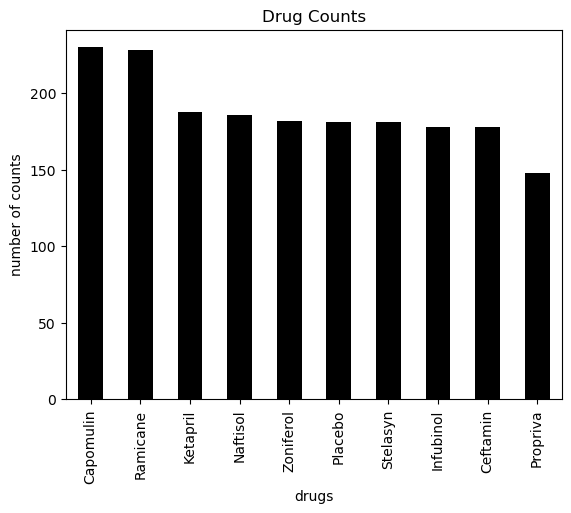

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
##use cleaned df for this
##first step: need the value counts for drug regimen, there is a method called value_counts()
##extract the drug regimen column cleaned_df, then use value_counts() on it
counts_drugs=cleaned_df["Drug Regimen"].value_counts()
##plot this as a bar plot using pandas
counts_drugs.plot(kind='bar', color='black')
##title, xlabel, ylabel
plt.title("Drug Counts")
plt.xlabel("drugs")
plt.ylabel("number of counts")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ramicane'),
  Text(2, 0, 'Ketapril'),
  Text(3, 0, 'Naftisol'),
  Text(4, 0, 'Zoniferol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Stelasyn'),
  Text(7, 0, 'Infubinol'),
  Text(8, 0, 'Ceftamin'),
  Text(9, 0, 'Propriva')])

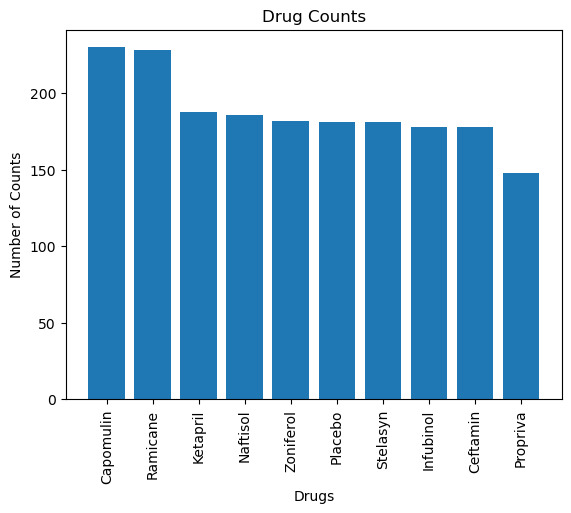

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
counts_drugs.index.values
counts_drugs.values
plt.bar(counts_drugs.index.values, counts_drugs.values)
plt.title("Drug Counts")
plt.ylabel("Number of Counts")
plt.xlabel("Drugs")
plt.xticks(rotation=90)

<Axes: ylabel='Sex'>

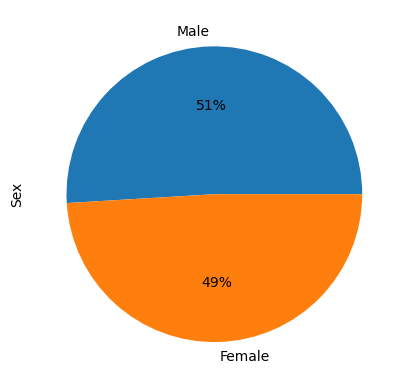

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
##counts using value_counts or the like for the mice genders
##extract thse sex column, from cleaned_df
sex_counts=cleaned_df["Sex"].value_counts()
##use sex_counts to create the pie chart
sex_counts.plot(kind="pie", autopct='%1.0f%%')

TypeError: can't multiply sequence by non-int of type 'float'

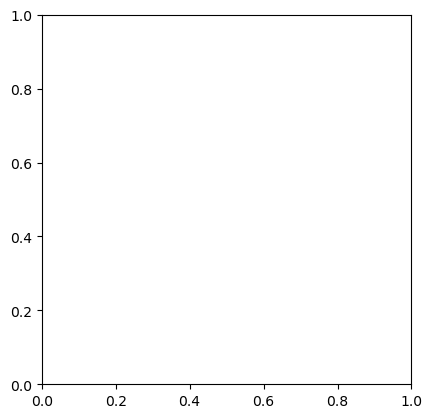

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
###step 1: get value counts for sex, sex.value_counts()
counts=cleaned_df.Sex.value_counts()
#counts=
#print(counts.values)
##step 2: plt.pie(include labels )
labels= counts.index.values
#print(labels)
plt.pie(counts.values, labels, autopct='%1.1f%%')


## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
##first step: need a grouby with mouse ID and timepoint and we need get the max 
max_tumor=cleaned_df.groupby(["Mouse ID"])["Timepoint"].max()
max_tumor=max_tumor.reset_index()
max_tumor
##secondly: reset the index 

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

##merge data with a left join 
merged_df=max_tumor.merge(cleaned_df, on=["Mouse ID", "Timepoint"], how="left")

In [ ]:
merged_df

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_df.loc[merged_df["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
orange_out = dict(markerfacecolor='red',markersize=12)
plt.boxplot(tumor_vol_list, labels = treatment_list,flierprops=orange_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume')

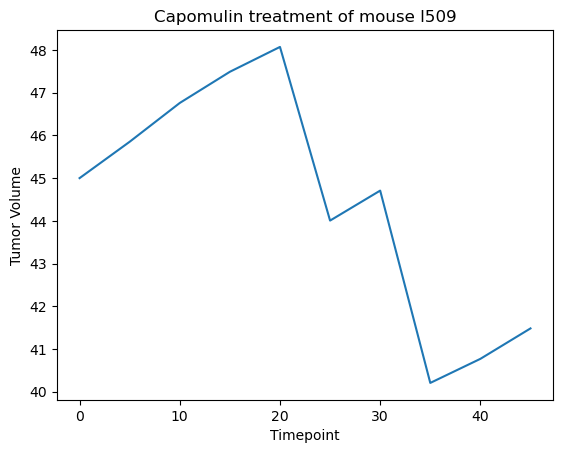

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_table=cleaned_df.loc[cleaned_df["Drug Regimen"]=="Capomulin"]
mousedata=capomulin_table.loc[capomulin_table['Mouse ID']=="l509"]
plt.plot(mousedata['Timepoint'], mousedata['Tumor Volume (mm3)'])
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")

Text(0, 0.5, 'Average Tumor Volume')

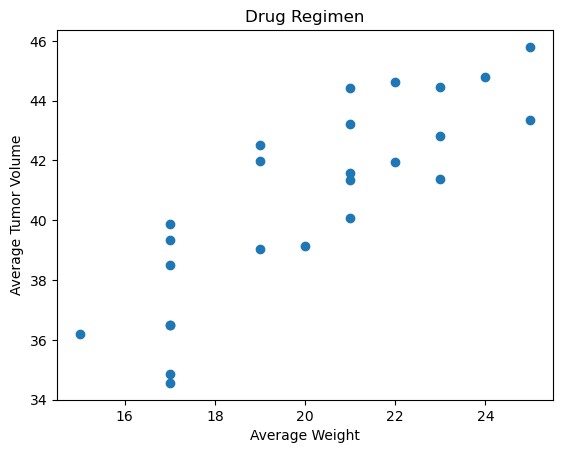

In [28]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_table=cleaned_df.loc[cleaned_df["Drug Regimen"]=="Capomulin"]
##first get the average tumor volume
capomulin_average=capomulin_table.groupby(["Mouse ID"])[["Weight (g)", "Tumor Volume (mm3)"]].mean()
##first plot part is going to be mouse weight
##then we need tumor volume
weight=capomulin_average["Weight (g)"]
average_tumor_volume= capomulin_average["Tumor Volume (mm3)"]
plt.scatter(weight, average_tumor_volume)
plt.title("Drug Regimen")
plt.xlabel("Average Weight")
plt.ylabel("Average Tumor Volume")

## Correlation and Regression

In [31]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr=round(st.pearsonr(capomulin_average["Weight (g)"], capomulin_average["Tumor Volume (mm3)"])[0], 2)

In [32]:
corr

0.84

In [34]:
model=st.linregress(capomulin_average["Weight (g)"], capomulin_average["Tumor Volume (mm3)"])

In [35]:
model

LinregressResult(slope=0.9544396890241049, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)

In [36]:
y_values=capomulin_average["Weight (g)"]*model[0]+model[1]

Text(0, 0.5, 'Average Tumor Volume')

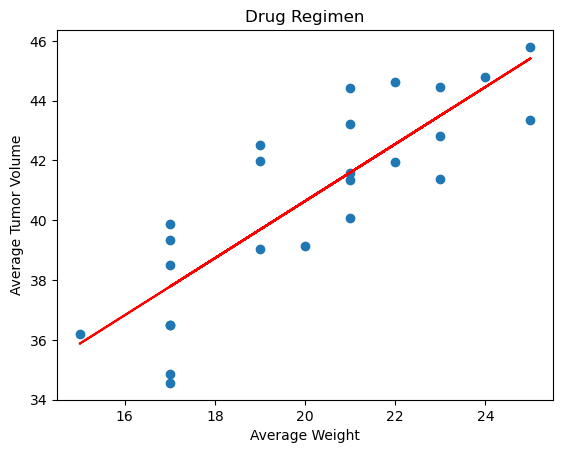

In [40]:
plt.scatter(capomulin_average["Weight (g)"], capomulin_average["Tumor Volume (mm3)"])
plt.plot(capomulin_average["Weight (g)"], y_values, color ="red")
plt.title("Drug Regimen")
plt.xlabel("Average Weight")
plt.ylabel("Average Tumor Volume")

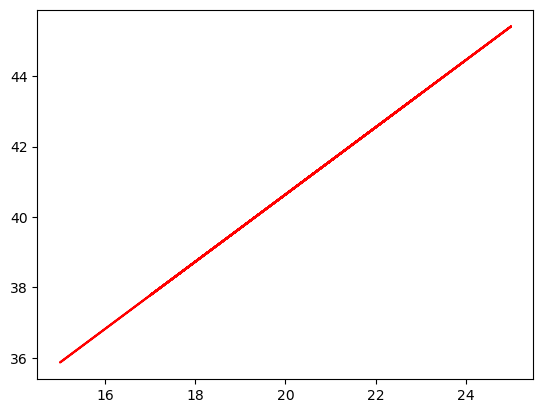

In [38]:
plt.plot(capomulin_average["Weight (g)"], y_values, color ="red")